In [1]:

### f(x)=a*x+b


# import vine dataset
import torch

import pandas as pd
import numpy as np
from sklearn.datasets import load_wine


wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [2]:
df=pd.DataFrame(data=wine.data,columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
y=df['alcohol']
X=df.drop(['alcohol'],axis=1)


#scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [4]:
X_train.shape

(142, 12)

In [5]:
def relu(x):
    return torch.maximum(torch.tensor(0.),x)

def forward(x):
    z2=x@w1+b1
    a2=relu(z2)
    y_pred=a2@w2+b2
    return y_pred

def mse_loss(y_pred,y):
    return torch.mean((y_pred-y)**2)

In [6]:
X_train=torch.tensor(X_train,dtype=torch.float32)
y_train=torch.tensor(y_train.values,dtype=torch.float32)
X_test=torch.tensor(X_test,dtype=torch.float32)
y_test=torch.tensor(y_test.values,dtype=torch.float32)


100%|██████████| 1500/1500 [00:27<00:00, 54.04it/s, test_loss=1.57, train_loss=1.13]


train_losses 1.1268400642233836
test_losses 1.5721447467803955


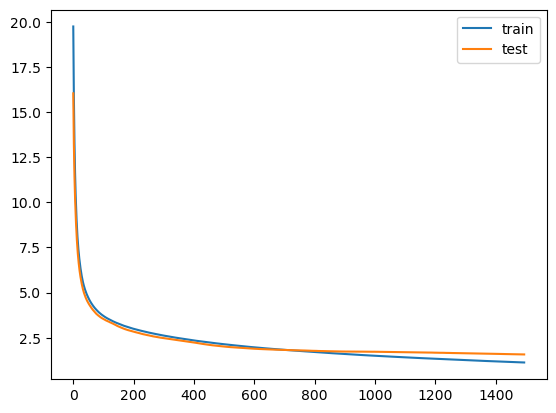

In [11]:
hidden_size = 20
from tqdm import tqdm


# set torch seed to 42
torch.manual_seed(42)

# welches shape braucht w1. Wir haben 12 input features und 20 hidden units, also 12x20
w1=torch.normal(std=1.,mean=0,size=(12,hidden_size),requires_grad=True)
# welches shape braucht w2. Wir haben 20 hidden units und 1 output, also 20x1
w2=torch.normal(std=1.,mean=0,size=(hidden_size,1),requires_grad=True)

b1=torch.zeros(hidden_size,requires_grad=True)
b2=torch.zeros(1,requires_grad=True)

epochs=1500
lr=0.0001
wd=0.01

import matplotlib.pyplot as plt

train_losses=[]
test_losses=[]
bar=tqdm(range(epochs))
for epoch in bar:
    epoch_loss=0
    for single_x, single_y in zip(X_train, y_train):
        y_pred=forward(single_x)
        loss=mse_loss(y_pred, single_y)+wd*((w1**2).sum()+wd*(w2**2).sum())
        loss.backward()
        epoch_loss+=loss.item()
        
        with torch.no_grad():
            w1.sub_(lr*w1.grad)
            w2.sub_(lr*w2.grad)
            b1.sub_(lr*b1.grad)
            b2.sub_(lr*b2.grad)
            w1.grad.zero_()
            w2.grad.zero_()
            b1.grad.zero_()
            b2.grad.zero_()
    test_pred=forward(X_test)
    test_loss=mse_loss(test_pred,y_test)
    test_losses.append(test_loss.item())
    train_losses.append(epoch_loss/len(X_train))
    bar.set_postfix(train_loss=train_losses[-1],test_loss=test_losses[-1])


print("train_losses",train_losses[-1])
print("test_losses",test_losses[-1])
plt.plot(train_losses[5:], label='train')
plt.plot(test_losses[5:], label='test')
plt.legend()
plt.show()

In [ ]:
y_test_pred=forward(X_test)

for i in range(15):
    print(y_test_pred[i].item(),y_test[i].item())

12.911481857299805 13.640000343322754
13.067329406738281 14.210000038146973
12.908123970031738 12.930000305175781
13.035833358764648 13.729999542236328
12.98601245880127 12.369999885559082
12.976871490478516 14.300000190734863
12.476759910583496 12.0
12.93796157836914 13.399999618530273
13.317728996276855 11.609999656677246
12.98790454864502 13.359999656677246
13.057701110839844 13.5
13.022032737731934 13.5
12.547788619995117 13.40999984741211
12.8656644821167 12.770000457763672
12.924324035644531 13.630000114440918
